<a href="https://colab.research.google.com/github/JurijJusel/Image/blob/t11-CNN-model/CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [16]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
# from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,roc_curve, auc

In [4]:
# connect to dataset in google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load data


In [17]:
augmented_data_path = '/content/drive/MyDrive/Colab Notebooks/Image/data/augmented/train/'
validate_data_path =  '/content/drive/MyDrive/Colab Notebooks/Image/data/augmented/validate/'

In [18]:
data=tf.keras.utils.image_dataset_from_directory(augmented_data_path)
validate_data=tf.keras.utils.image_dataset_from_directory(validate_data_path)

Found 3567 files belonging to 2 classes.
Found 603 files belonging to 2 classes.


In [7]:
data_iterator = data.as_numpy_iterator()

In [8]:
batch = data_iterator.next()

In [8]:
batch[0].shape

(32, 256, 256, 3)

In [9]:
batch[1]

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0], dtype=int32)

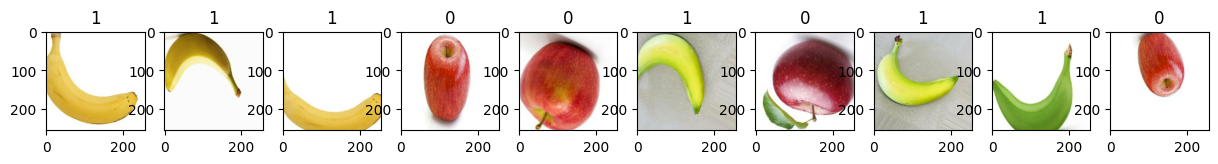

In [10]:
fig, ax = plt.subplots(ncols=10, figsize=(15,15))
for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Data preprocessing

In [19]:
# Scale Data
data_scale = data.map(lambda x, y:(x/255, y))
validate_data_scale=validate_data.map(lambda x, y:(x/255, y))

In [20]:
scaled_iterator = data_scale.as_numpy_iterator()
batch = scaled_iterator.next()
batch[0].min()

0.0

In [ ]:
batch[0].max()

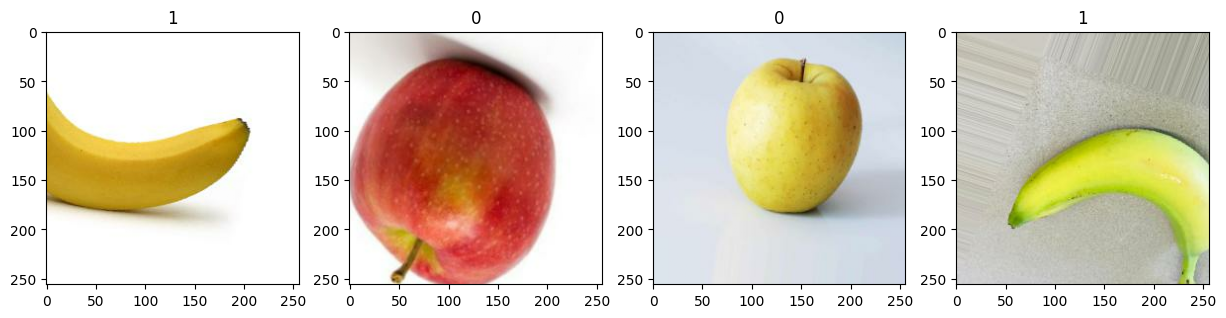

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(15,15))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [32]:
model = Sequential()

In [33]:
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(512, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [34]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 512)       295424    
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 512)     

In [35]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 512)       295424    
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 512)     

# Train model

In [37]:
history = model.fit(data_scale, steps_per_epoch=10, epochs=10, validation_data=validate_data_scale, validation_steps=10)

Epoch 1/10
10/10 [==============================] - 120s 12s/step - loss: 2.6862 - accuracy: 0.6187 - val_loss: 0.5438 - val_accuracy: 0.7375
Epoch 2/10
10/10 [==============================] - 132s 14s/step - loss: 0.4478 - accuracy: 0.7906 - val_loss: 0.4199 - val_accuracy: 0.8000
Epoch 3/10
10/10 [==============================] - 129s 13s/step - loss: 0.3979 - accuracy: 0.8125 - val_loss: 0.2510 - val_accuracy: 0.9062
Epoch 4/10
10/10 [==============================] - 131s 14s/step - loss: 0.2369 - accuracy: 0.9031 - val_loss: 0.1937 - val_accuracy: 0.9219
Epoch 5/10
10/10 [==============================] - 130s 13s/step - loss: 0.2545 - accuracy: 0.8813 - val_loss: 0.1439 - val_accuracy: 0.9531
Epoch 6/10
10/10 [==============================] - 131s 14s/step - loss: 0.1759 - accuracy: 0.9219 - val_loss: 0.1605 - val_accuracy: 0.9438
Epoch 7/10
10/10 [==============================] - 128s 13s/step - loss: 0.2267 - accuracy: 0.9031 - val_loss: 0.1567 - val_accuracy: 0.9438
Epoch 

In [38]:
history.history

{'loss': [2.6861867904663086,
  0.4478047490119934,
  0.39790987968444824,
  0.23689933121204376,
  0.2544897794723511,
  0.17592757940292358,
  0.22667141258716583,
  0.21426697075366974,
  0.18518204987049103,
  0.14030146598815918],
 'accuracy': [0.6187499761581421,
  0.7906249761581421,
  0.8125,
  0.903124988079071,
  0.8812500238418579,
  0.921875,
  0.903124988079071,
  0.9125000238418579,
  0.9312499761581421,
  0.9593750238418579],
 'val_loss': [0.5438148379325867,
  0.41991013288497925,
  0.25102537870407104,
  0.19373714923858643,
  0.1438913196325302,
  0.16045287251472473,
  0.15671542286872864,
  0.13815180957317352,
  0.10776333510875702,
  0.11279849708080292],
 'val_accuracy': [0.737500011920929,
  0.800000011920929,
  0.90625,
  0.921875,
  0.953125,
  0.9437500238418579,
  0.9437500238418579,
  0.9593750238418579,
  0.965624988079071,
  0.9593750238418579]}

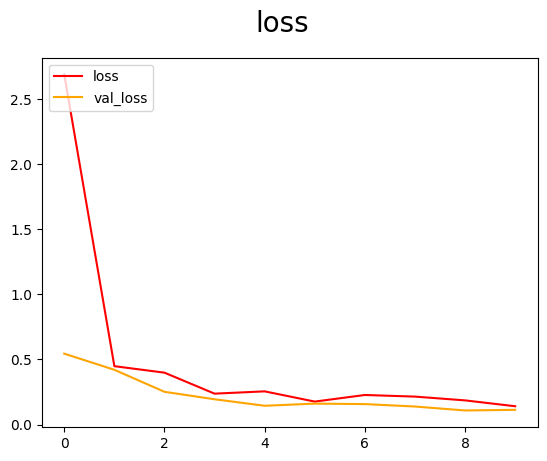

In [39]:
#Plot Performance
fig=plt.figure()
plt.plot(history.history['loss'], color='red', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

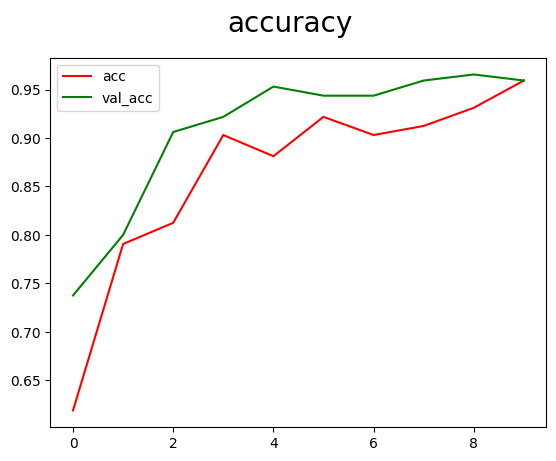

In [40]:
fig=plt.figure()
plt.plot(history.history['accuracy'], color='red', label='acc')
plt.plot(history.history['val_accuracy'], color='green', label='val_acc')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()



# Save model

In [41]:
model.save('/content/drive/MyDrive/Colab Notebooks/Image/models/cnn_model_s10_e10.h5')

# Test image

In [42]:
import cv2
import matplotlib.pyplot as plt


In [56]:
user_image='/content/drive/MyDrive/Colab Notebooks/Image/dataset/apple/Image_67.jpg'  # apple
# user_image='/content/drive/MyDrive/Colab Notebooks/Image/dataset/banana/Image_93.jpg'  # banana

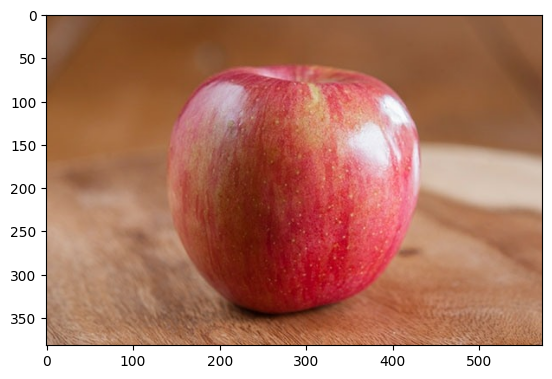

In [57]:
img_read = cv2.imread(user_image)
plt.imshow(cv2.cvtColor(img_read,cv2.COLOR_BGR2RGB))
plt.show()
# img_path

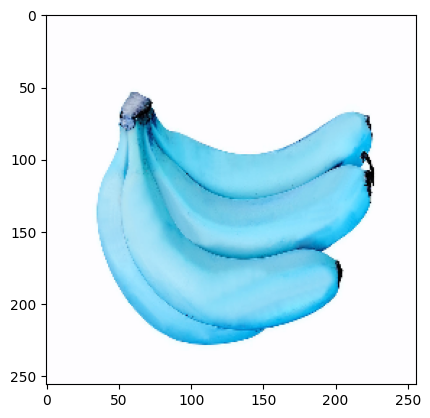

In [51]:
img_resize = cv2.resize(img_read, (256, 256))
plt.imshow(img_resize)
plt.show()

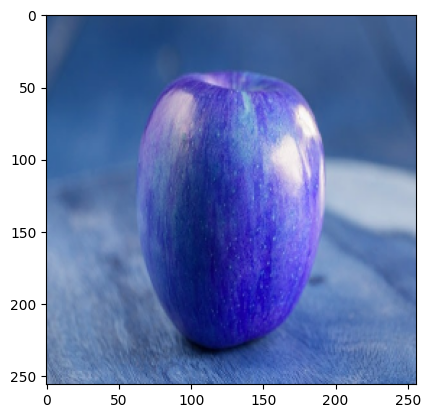

In [58]:
img_resize = tf.image.resize(img_read, (256, 256))
plt.imshow(img_resize.numpy().astype(int))
plt.show()

In [43]:
# np_exp= np.expand_dims(img_resize,0).shape

In [59]:
img_array = np.array(img_resize) / 255.0  # normalize pixel values
img_expanded = np.expand_dims(img_array, axis=0)  # expand dimensions to match input shape


In [61]:
predict_model = model.predict(img_expanded)
predict_model

1/1 [==============================] - 0s 110ms/step


array([[0.05406389]], dtype=float32)

# Load model


In [47]:
model = load_model('/content/drive/MyDrive/Colab Notebooks/Image/models/cnn_model_s10_e10.h5')

In [60]:
predictions = model.predict(img_expanded)
predictions

1/1 [==============================] - 0s 193ms/step


array([[0.05406389]], dtype=float32)

# Confusion matrix

In [12]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,roc_curve, auc

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# generate predicted labels for test data
y_pred = model.predict(test_data)

# convert predicted labels from probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# convert true labels to class labels
y_true = np.argmax(test_labels, axis=1)

# create confusion matrix
cm = confusion_matrix(y_true, y_pred)


In [ ]:
confusion_matrix = confusion_matrix(data_scale, validate_data_scale)
confusion_matrix

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
cm_display.plot()